Actual attempts at performing lifetime prediction. 

The goal is to develop a special LSTM prediction after transforming the variables. 

The first attempt is to look at the possibility of using an autoencoder to build layers for future devices and potentially smooth values. 

We can build out those recursive elements in the next attempt. Note that settings will not be time based. We can eliminate very low time sensitivity variables from that group as well. 

One of the key elements will be to divide into clusters and split local variance from the other major areas. 

In [33]:
import torch
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [2]:
traindf=pd.read_csv(r"C:\Users\Daniel\3D Objects\Nasa_maitenance\Challenge_Data\train.txt",delim_whitespace=True, header=None)
validdf=pd.read_csv(r"C:\Users\Daniel\3D Objects\Nasa_maitenance\Challenge_Data\test.txt",delim_whitespace=True, header=None)
finaldf=pd.read_csv(r"C:\Users\Daniel\3D Objects\Nasa_maitenance\Challenge_Data\final_test.txt",delim_whitespace=True, header=None)
print("Dataframe sizes: {},{},{}".format(traindf.shape,validdf.shape,finaldf.shape))

Dataframe sizes: (45918, 26),(29820, 26),(55156, 26)


In [3]:
#Can scale all data at once. Normally we split the data up going forward, but this was already done. 
#We could build a function that outputs a matrix
scaler = StandardScaler()
alldf=pd.concat([traindf,validdf,finaldf])
print(alldf[2:].head())
alldf[2:]=scaler.fit_transform(alldf[2:])
place1=45918+29820
place2=place1+55156
traindf_sc=alldf.iloc[0:45918,:]
validdf_sc=alldf.iloc[place1:place2,:]
finaldf_sc=alldf.iloc[place2:,:]

   0   1        2       3     4       5       6        7        8     9   ...  \
2   1   3  34.9986  0.8401  60.0  449.44  555.42  1368.17  1122.49  5.48  ...   
3   1   4  20.0031  0.7005   0.0  491.19  607.03  1488.44  1249.18  9.35  ...   
4   1   5  42.0041  0.8405  40.0  445.00  549.52  1354.48  1124.32  3.91  ...   
5   1   6  20.0032  0.7017   0.0  491.19  607.37  1480.46  1258.90  9.35  ...   
6   1   7  41.9998  0.8400  40.0  445.00  549.57  1354.43  1131.44  3.91  ...   

       16       17       18      19    20   21    22     23     24       25  
2  183.26  2387.95  8063.84  9.3557  0.02  334  2223  100.0  14.83   8.8555  
3  314.84  2388.07  8052.30  9.2231  0.02  364  2324  100.0  24.42  14.7832  
4  130.44  2387.89  8083.67  9.2986  0.02  330  2212  100.0  10.99   6.4025  
5  315.36  2388.05  8053.17  9.2276  0.02  364  2324  100.0  24.44  14.7019  
6  130.16  2387.88  8082.01  9.3753  0.02  331  2212  100.0  10.53   6.4254  

[5 rows x 26 columns]


In [4]:
### Auto-encoder for potential noise reduction and potential 

class Autoencode(torch.nn.Module):
    def __init__(self):
        super().__init__()

        #encoding
        self.encoder=torch.nn.Sequential(
            torch.nn.Linear(24, 20),
            torch.nn.ReLU()
            )
        
        #decoding
        self.decoder=torch.nn.Sequential(
            torch.nn.Linear(20,24),
            torch.nn.Sigmoid()
            )
            
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [5]:
#Auto-encoder trainer
alldf[2:]    

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
2,-1.429151,-1.392955,0.742679,0.864190,0.336090,-0.885431,-0.644181,-0.475659,-0.679880,-0.702847,...,-0.598621,0.418791,-0.001568,0.043409,-0.686796,-0.502145,-0.036436,0.419797,-0.601803,-0.608984
3,-1.429151,-1.376980,-0.272025,0.414609,-1.510070,0.694222,0.738029,0.658146,0.383048,0.365579,...,0.354721,0.419726,-0.138296,-0.133299,-0.686796,0.577691,0.657071,0.419797,0.366805,0.388855
4,-1.429151,-1.361006,1.216722,0.865478,-0.279296,-1.053423,-0.802194,-0.604717,-0.664526,-1.136292,...,-0.981320,0.418324,0.233380,-0.032684,-0.686796,-0.646123,-0.111967,0.419797,-0.989650,-1.021910
5,-1.429151,-1.345032,-0.272019,0.418474,-1.510070,0.694222,0.747135,0.582917,0.464599,0.365579,...,0.358489,0.419570,-0.127988,-0.127302,-0.686796,0.577691,0.657071,0.419797,0.368826,0.375170
6,-1.429151,-1.329057,1.216431,0.863868,-0.279296,-1.053423,-0.800854,-0.605189,-0.604789,-1.136292,...,-0.983349,0.418246,0.213712,0.069529,-0.686796,-0.610129,-0.111967,0.419797,-1.036111,-1.018055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55151,2.555096,-0.753981,0.742692,0.865478,0.336090,-0.885431,-0.640967,-0.547494,-0.682145,-0.702847,...,-0.596665,0.419570,0.047483,-0.109178,-0.686796,-0.574134,-0.036436,0.419797,-0.584633,-0.603749
55152,2.555096,-0.738007,-1.625519,-1.840056,1.566864,1.733955,1.685570,1.525350,1.608994,1.820517,...,1.859144,0.419181,0.832896,-1.206473,1.456036,1.513548,1.096522,0.419797,1.843454,1.835492
55153,2.555096,-0.722033,0.743308,0.866122,0.336090,-0.885431,-0.654358,-0.536653,-0.674846,-0.702847,...,-0.598259,0.419336,0.053170,-0.065068,-0.686796,-0.538140,-0.036436,0.419797,-0.586653,-0.606139
55154,2.555096,-0.706058,-0.948380,-1.033645,-0.894683,0.613253,0.673753,0.741293,0.784426,0.688592,...,0.772415,0.419414,0.801617,-0.942211,1.456036,0.757663,0.622739,0.419797,0.796064,0.815601


In [55]:

trainloader_ae=torch.utils.data.DataLoader(torch.tensor(traindf_sc.loc[:,2:].values), batch_size=16,shuffle=True)
validloader_ae=torch.utils.data.DataLoader(validdf_sc.loc[:,2:].values, batch_size=16,shuffle=True)


In [59]:
#Autoencoder training

#Initiate values, MSEloss fairly standard for Autoencoder as we care about final variable result differences like regression
#optimization route is a standard Adam process


model=Autoencode()
loss_function=torch.nn.MSELoss()
optimizer=optimizer = torch.optim.Adadelta(model.parameters(),lr = 1e-2,weight_decay = 1e-7)

epochs=30
outputs=[]
losses=[]
loss_valid=[]

min_valid_loss=np.inf

for epoch in range(epochs):
    train_loss=0.0
    valid_loss = 0.0

    for data in trainloader_ae:
        # Output of Autoencoder
        data=data.float()
        reconstructed = model(data)
        
        # Calculating the loss function
        loss = loss_function(reconstructed, data)
        # The gradients are set to zero,
        # the the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Storing the losses in a list for plotting
        train_loss+=loss.item()
    outputs.append((epochs, data, reconstructed))
    model.eval()     # Optional when not using Model Specific layer
    losses.append(loss)

    for data in validloader_ae:        
        data=data.float()
        target = model(data)
        loss = loss_function(target,data)
        valid_loss = loss.item() * data.size(0)
        if min_valid_loss > valid_loss:
            print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
            min_valid_loss = valid_loss
            # Saving State Dict
            torch.save(model.state_dict(), 'saved_model.pth')
    loss_valid.append(valid_loss)


Validation Loss Decreased(inf--->11.616913) 	 Saving The Model
Validation Loss Decreased(11.616913--->8.572526) 	 Saving The Model
Validation Loss Decreased(8.572526--->8.300271) 	 Saving The Model
Validation Loss Decreased(8.300271--->6.432396) 	 Saving The Model
Validation Loss Decreased(6.432396--->6.422402) 	 Saving The Model
Validation Loss Decreased(6.422402--->6.254780) 	 Saving The Model
Validation Loss Decreased(6.254780--->6.036751) 	 Saving The Model
Validation Loss Decreased(6.036751--->1.336931) 	 Saving The Model
Validation Loss Decreased(1.336931--->1.148500) 	 Saving The Model
Validation Loss Decreased(1.148500--->0.911487) 	 Saving The Model
Validation Loss Decreased(0.911487--->0.869480) 	 Saving The Model


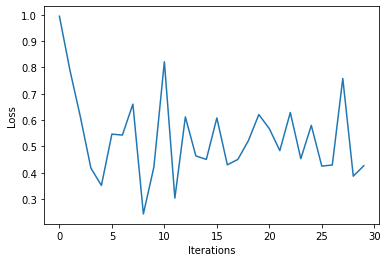

In [60]:
# Defining the Plot Style
plt.xlabel('Iterations')
plt.ylabel('Loss')
  
# Plotting the last 100 values
plt.plot(losses)


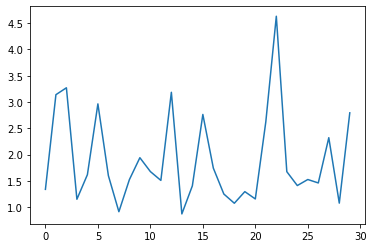

In [61]:
plt.plot(loss_valid)